In [1]:
import numpy as np
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Grouper
from pandas import DataFrame
import csv
import pickle
import math
import matrixprofile as mp
from matplotlib.patches import Rectangle
from fbprophet import Prophet
from prophet.plot import plot_yearly
from sklearn.metrics import mean_squared_error
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from sklearn.model_selection import TimeSeriesSplit
from numpy import sqrt

/home/jonathan/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def df_origen(origen,destino):    
    
    ######################PICKLE 1###############################
    with open('/home/jonathan/tesis/3er_avance/columns_names_confinamiento1.pickle', "rb") as file:   
        columns_names = pickle.load(file)

    names = list(columns_names)
    lista=["ds"]

    for trayectos in names:    
        x=trayectos.startswith(origen)    
        if x==True:                         
            lista.append(trayectos)
    
    df1 = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento1.csv", sep=',',index_col=0, parse_dates=True, usecols=lista)
    
    #Filtramos el destino
    columns_names_df = df1.columns   
    names_1 = list(columns_names_df)     
    
    listaDst=["ds"]
    for trayectos in names_1:            
        x=trayectos.split("-",1)[1]        
        if x==destino:                         
            listaDst.append(trayectos)            
    
    df1_Final = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento1.csv", sep=',',index_col=0, parse_dates=True, usecols=listaDst)   
    
    ######################PICKLE 2###############################
    with open('/home/jonathan/tesis/3er_avance/columns_names_confinamiento2.pickle', "rb") as file:   
        columns_names = pickle.load(file)

    names = list(columns_names)
    lista=["ds"]

    for trayectos in names:    
        x=trayectos.startswith(origen)    
        if x==True:                         
            lista.append(trayectos)
    
    df2 = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento2.csv", sep=',',index_col=0, parse_dates=True, usecols=lista)
    
    #Filtramos el destino
    columns_names_df = df2.columns   
    names_1 = list(columns_names_df)     
    
    listaDst=["ds"]
    for trayectos in names_1:            
        x=trayectos.split("-",1)[1]        
        if x==destino:                         
            listaDst.append(trayectos)           
    
    df2_Final = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento2.csv", sep=',',index_col=0, parse_dates=True, usecols=listaDst)   
    
    ######################PICKLE 3###############################
    with open('/home/jonathan/tesis/3er_avance/columns_names_confinamiento3.pickle', "rb") as file:   
        columns_names = pickle.load(file)

    names = list(columns_names)
    lista=["ds"]

    for trayectos in names:    
        x=trayectos.startswith(origen)    
        if x==True:                         
            lista.append(trayectos)
    
    df3 = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento3.csv", sep=',',index_col=0, parse_dates=True, usecols=lista)
    
    #Filtramos el destino
    columns_names_df = df3.columns   
    names_1 = list(columns_names_df)     
    
    listaDst=["ds"]
    for trayectos in names_1:            
        x=trayectos.split("-",1)[1]        
        if x==destino:                         
            listaDst.append(trayectos)            
    
    df3_Final = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento3.csv", sep=',',index_col=0, parse_dates=True, usecols=listaDst)
    
    
    
    df1_Final['Fecha'] = df1_Final.index.date
    df1_Final['Año'] = df1_Final.index.year                                
    df1_Final['Mes'] = df1_Final.index.month                               
    df1_Final['ID_Dia'] = df1_Final.index.dayofweek
    df1_Final['Hora'] = df1_Final.index.hour
    df1_Final['WeekNo'] = df1_Final.index.isocalendar().week
    
    df2_Final['Fecha'] = df2_Final.index.date
    df2_Final['Año'] = df2_Final.index.year                                
    df2_Final['Mes'] = df2_Final.index.month                               
    df2_Final['ID_Dia'] = df2_Final.index.dayofweek
    df2_Final['Hora'] = df2_Final.index.hour
    df2_Final['WeekNo'] = df2_Final.index.isocalendar().week
    
    df3_Final['Fecha'] = df3_Final.index.date
    df3_Final['Año'] = df3_Final.index.year                                
    df3_Final['Mes'] = df3_Final.index.month                               
    df3_Final['ID_Dia'] = df3_Final.index.dayofweek
    df3_Final['Hora'] = df3_Final.index.hour
    df3_Final['WeekNo'] = df3_Final.index.isocalendar().week
    
    return df1, lista, df2, df3, df1_Final,df2_Final,df3_Final, listaDst

In [3]:
origen = "2807905"
destino = "2807901"
df1, lista, df2, df3, df1_Final,df2_Final,df3_Final, listaDst = df_origen(origen,destino)
df1_Final.head(5)
df2_Final.head(5)
df3_Final.head(5)

,2807905-2807901,Fecha,Año,Mes,ID_Dia,Hora,WeekNo
ds,,,,,,,
2020-08-01 00:00:00,342.675,2020-08-01,2020,8,5,0,31
2020-08-01 01:00:00,161.815,2020-08-01,2020,8,5,1,31
2020-08-01 02:00:00,69.203,2020-08-01,2020,8,5,2,31
2020-08-01 03:00:00,44.679,2020-08-01,2020,8,5,3,31
2020-08-01 04:00:00,27.632,2020-08-01,2020,8,5,4,31


In [4]:
#Creamos intervalos de datos por periodos
data1=df1_Final.loc['2020-03-16':'2020-04-15']
data2=df1_Final.loc['2020-04-16':'2020-05-15']
data3=df1_Final.loc['2020-05-01':'2020-05-31']
data4=df2_Final.loc['2020-06-01':'2020-06-30']
data5=df2_Final.loc['2020-07-01':'2020-07-31']
data6=df3_Final.loc['2020-08-01':'2020-08-31']
data6.tail(5)

,2807905-2807901,Fecha,Año,Mes,ID_Dia,Hora,WeekNo
ds,,,,,,,
2020-08-31 19:00:00,509.100,2020-08-31,2020,8,0,19,36
2020-08-31 20:00:00,293.615,2020-08-31,2020,8,0,20,36
2020-08-31 21:00:00,256.641,2020-08-31,2020,8,0,21,36
2020-08-31 22:00:00,172.866,2020-08-31,2020,8,0,22,36
2020-08-31 23:00:00,140.111,2020-08-31,2020,8,0,23,36


In [5]:
##### Creamos tablas con cada uno de los principales trayectos
lista_periodos=[1,2,3,4,5,6]    
dict_dias={0:"Monday",1:"Tuesday",2:"Wednesday",3:"Thursday",4:"Friday",5:"Saturday",6:"Sunday"}
        
for periodo in lista_periodos:        
    cont=0
    globals()[f"d{periodo}"] = globals()[f"data{periodo}"].reset_index()                                
    globals()[f"df_{periodo}"] = pd.DataFrame(data=globals()[f"d{periodo}"], columns=['ds',listaDst[1],'Hora','Fecha','WeekNo','ID_Dia'])
    globals()[f"df_{periodo}"].set_index([listaDst[1]], inplace = True) 
    
    for dia in dict_dias:        
        globals()[f"df_{dict_dias[dia]}_{periodo}"] = globals()[f"df_{periodo}"].loc[globals()[f"df_{periodo}"].loc[:,'ID_Dia'] == cont]  # Seleccionamos solo los datos del lunes o solo los datos del martes para crear nuevas tablas dependiendo del día        
        globals()[f"filtrado_Data_{dict_dias[dia]}_{periodo}"] = pd.DataFrame({})  #Creamos un nuevo dataframe vacio
        globals()[f"filtrado_Data_{dict_dias[dia]}_{periodo}"] = globals()[f"filtrado_Data_{dict_dias[dia]}_{periodo}"].append(globals()[f"df_{dict_dias[dia]}_{periodo}"])  #Guardamos en el dataframe vacio cada una de las tablas, hay tabla lunes, tabla martes..
        
        #Seleccionamos celdas del dataframe para generar las fechas que se requieren graficar
        start = globals()[f"filtrado_Data_{dict_dias[dia]}_{periodo}"].iloc[0]['Fecha'] #Primera celda de la columna fecha
        period_start = globals()[f"filtrado_Data_{dict_dias[dia]}_{periodo}"].iloc[0]['WeekNo']
        period_end = globals()[f"filtrado_Data_{dict_dias[dia]}_{periodo}"].at[globals()[f"filtrado_Data_{dict_dias[dia]}_{periodo}"].index[-1],'WeekNo']  #última celda de columna WeekNo
        
        #Condición de error en period_start/period_end
        if (type(period_start) == pd.core.series.Series) | (type(period_end) == pd.core.series.Series):    
            lista = list(period_end)
            period_end = lista[-1]        
        
        periods = list(range(period_start, period_end+1))

        #Obtenemos las fechas de cada día 
        date_generated = pd.date_range(start, periods=len(periods), freq='7D')
        
        #Creamos una tabla para cada fecha de cada lunes o de cada martes..
        cont2=1        
        for date in date_generated:            
            globals()[f"filtrado_Data_{dict_dias[dia]}_{periodo}_{cont2}"] = globals()[f"filtrado_Data_{dict_dias[dia]}_{periodo}"].loc[globals()[f"filtrado_Data_{dict_dias[dia]}_{periodo}"].loc[:,'Fecha'] == date]
            cont2=cont2+1
        cont=cont+1
    

/tmp/ipykernel_22169/4220055855.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  globals()[f"filtrado_Data_{dict_dias[dia]}_{periodo}"] = globals()[f"filtrado_Data_{dict_dias[dia]}_{periodo}"].append(globals()[f"df_{dict_dias[dia]}_{periodo}"])  #Guardamos en el dataframe vacio cada una de las tablas, hay tabla lunes, tabla martes..
/home/jonathan/anaconda3/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
/tmp/ipykernel_22169/4220055855.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  globals()[f"filt

/tmp/ipykernel_22169/4220055855.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  globals()[f"filtrado_Data_{dict_dias[dia]}_{periodo}"] = globals()[f"filtrado_Data_{dict_dias[dia]}_{periodo}"].append(globals()[f"df_{dict_dias[dia]}_{periodo}"])  #Guardamos en el dataframe vacio cada una de las tablas, hay tabla lunes, tabla martes..
/home/jonathan/anaconda3/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
/tmp/ipykernel_22169/4220055855.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  globals()[f"filt

In [6]:
period1 = filtrado_Data_Monday_3
period2 = filtrado_Data_Monday_4
period3 = filtrado_Data_Monday_5
period4 = filtrado_Data_Monday_6
Lunes = pd.concat([period1,period2,period3,period4])
start_date = pd.Timestamp('2020-05-02')
end_date = pd.Timestamp('2020-08-31')
mask = (Lunes['Fecha'] >= start_date) & (Lunes['Fecha'] <= end_date)
Lunes = Lunes.loc[mask]
Lunes = Lunes.reset_index()
Lunes = Lunes.set_index(["ds"])
#desescalada.tail(50)

/home/jonathan/anaconda3/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


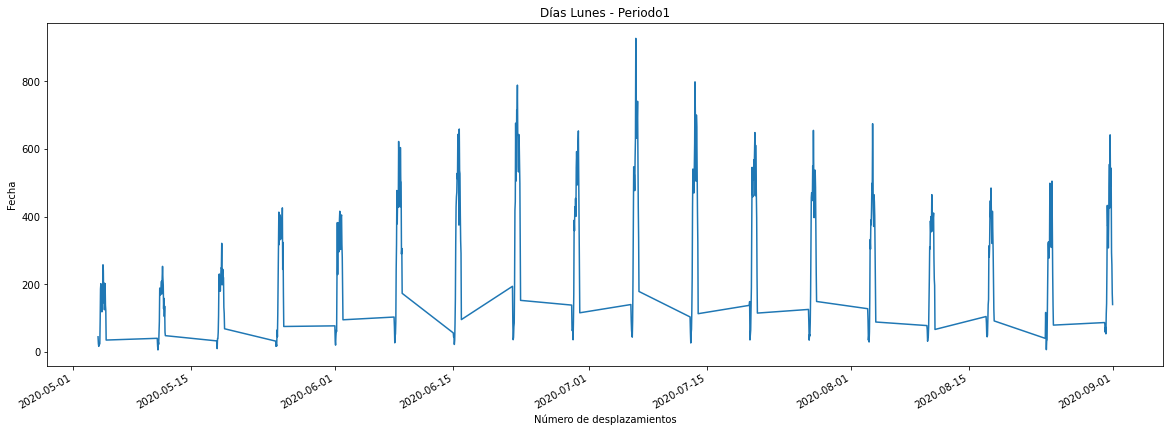

In [7]:
Lunes[Lunes.columns[0]].plot(figsize=(20,7), legend=None, title='Días Lunes - Periodo1')
plt.xlabel('Número de desplazamientos')
plt.ylabel('Fecha')
plt.show()

# Patrón Día Lunes 8 Am

In [8]:
filtrar_Hora1 = Lunes.loc[Lunes.loc[:,'Hora'] == 1]
filtrar_Hora2 = Lunes.loc[Lunes.loc[:,'Hora'] == 2]
filtrar_Hora3 = Lunes.loc[Lunes.loc[:,'Hora'] == 7]
filtrar_Hora4 = Lunes.loc[Lunes.loc[:,'Hora'] == 8]
filtrar_Hora5 = Lunes.loc[Lunes.loc[:,'Hora'] == 12]
filtrar_Hora6 = Lunes.loc[Lunes.loc[:,'Hora'] == 13]
filtrar_Hora7 = Lunes.loc[Lunes.loc[:,'Hora'] == 14]
filtrar_Hora8 = Lunes.loc[Lunes.loc[:,'Hora'] == 17]
filtrar_Hora9 = Lunes.loc[Lunes.loc[:,'Hora'] == 18]
filtrar_Hora10 = Lunes.loc[Lunes.loc[:,'Hora'] == 19]
filtrar_Hora11 = Lunes.loc[Lunes.loc[:,'Hora'] == 22]
filtrar_Hora12 = Lunes.loc[Lunes.loc[:,'Hora'] == 23]
filtrar_Hora13 = Lunes.loc[Lunes.loc[:,'Hora'] == 0]


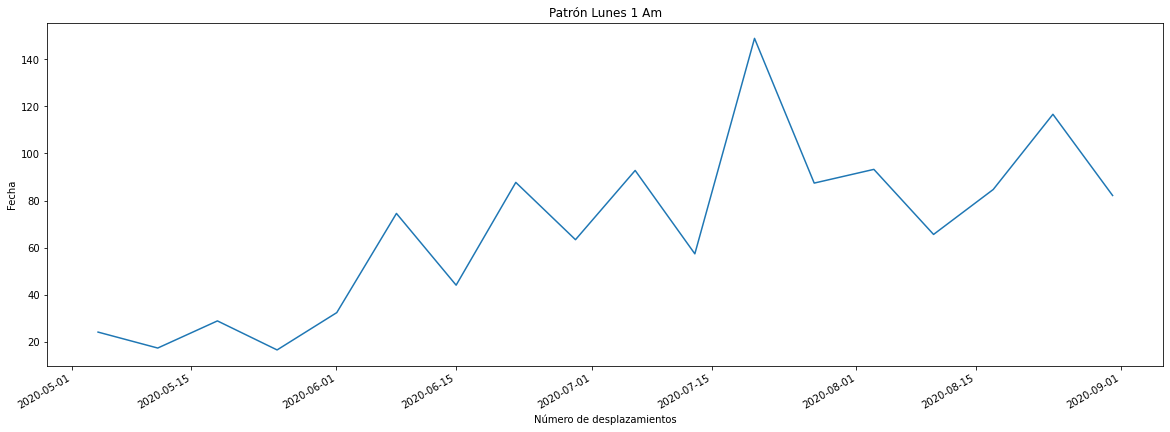

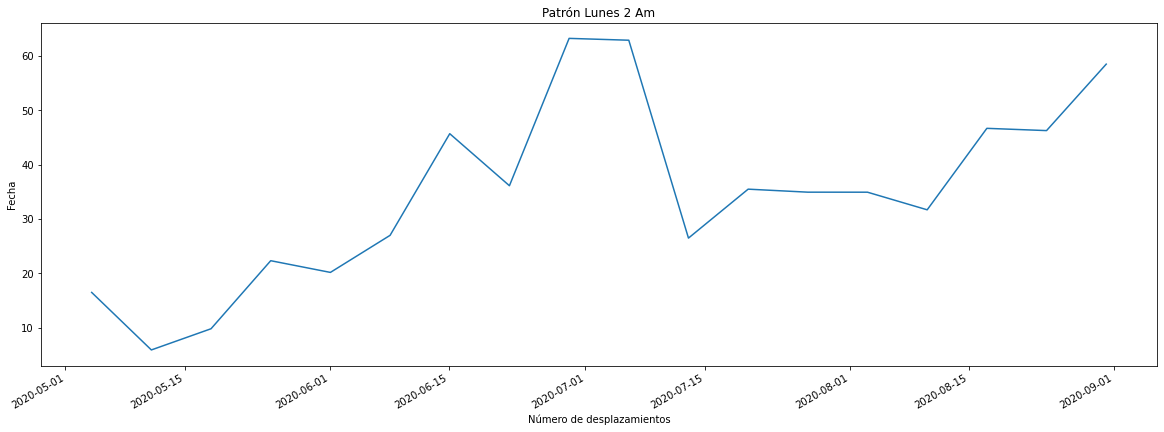

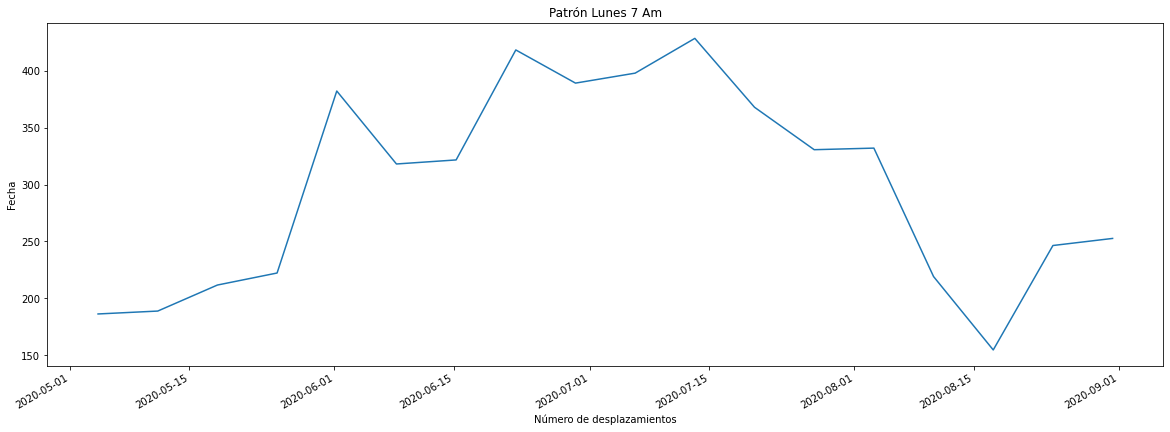

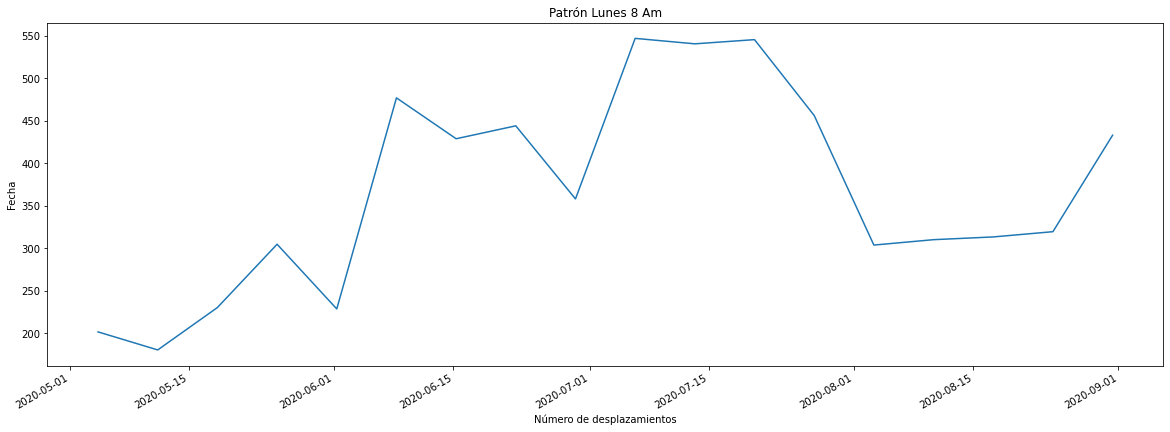

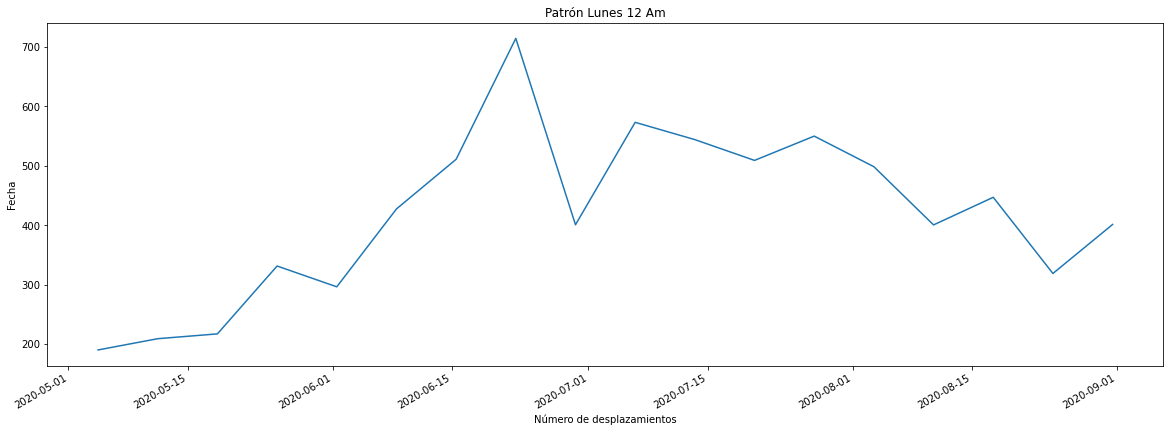

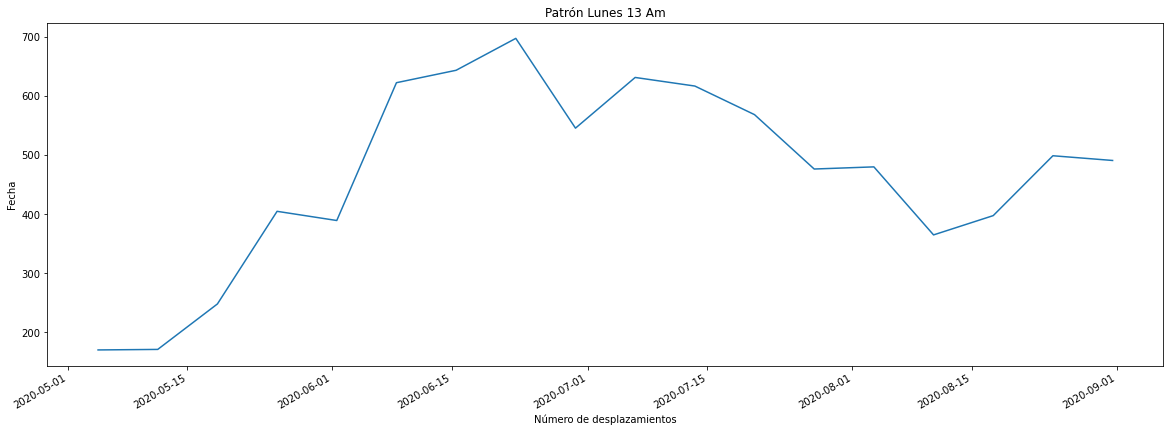

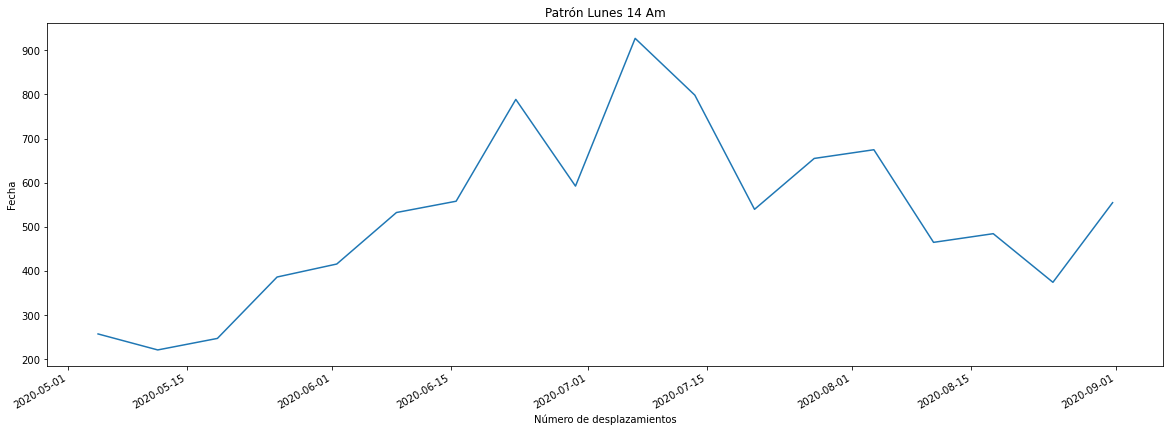

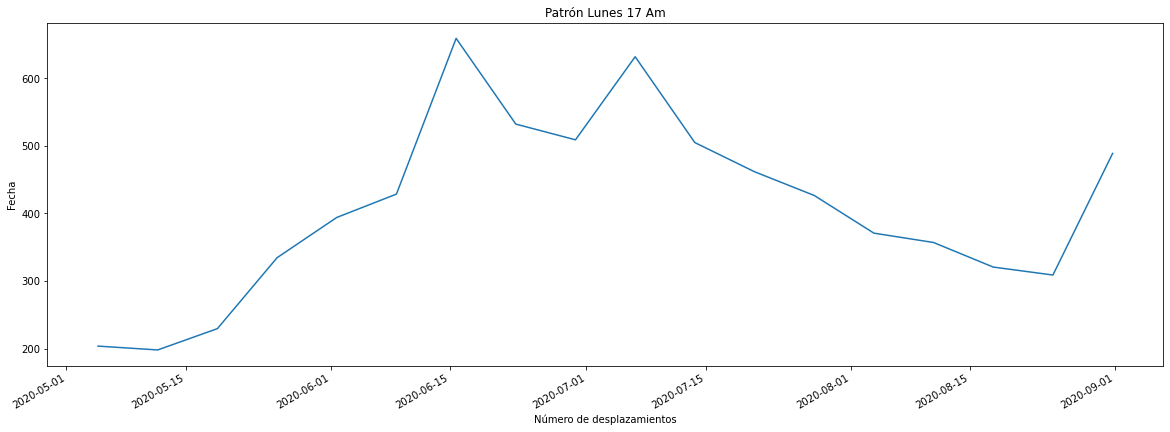

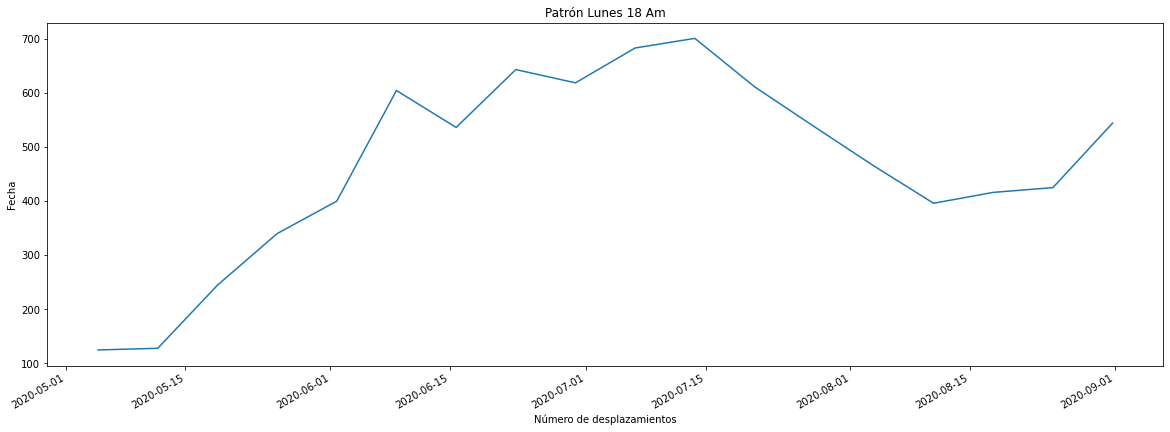

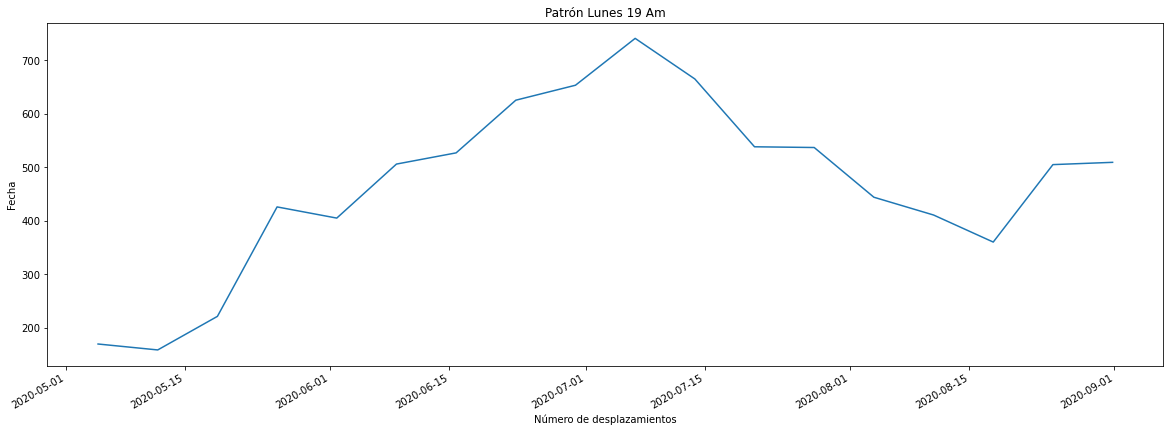

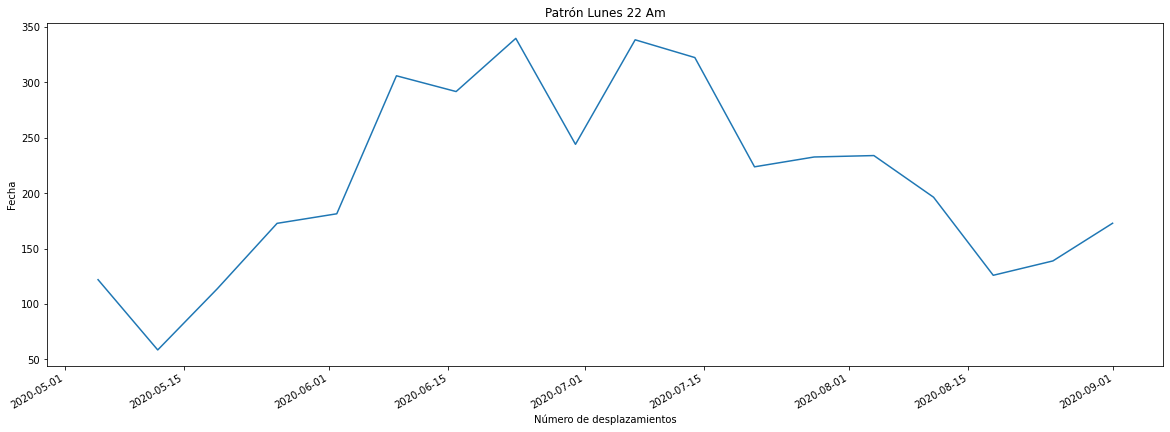

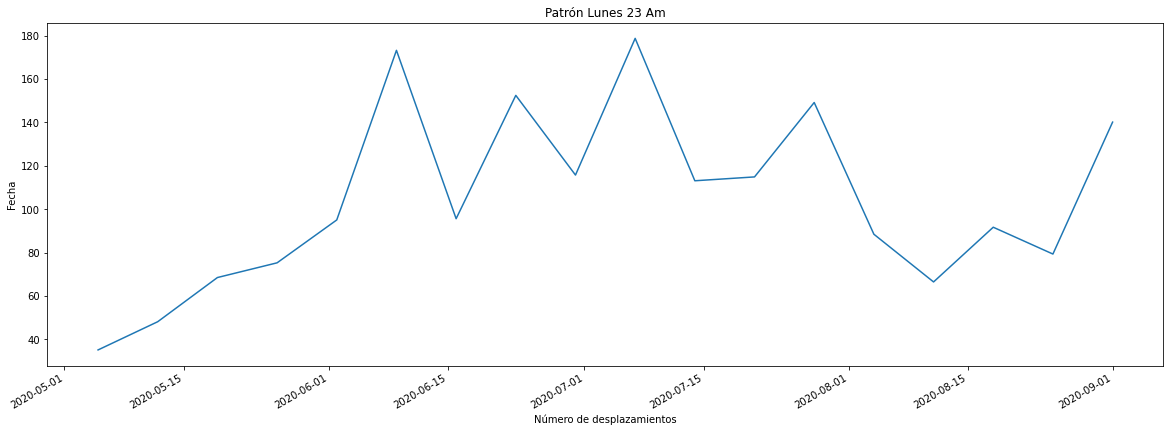

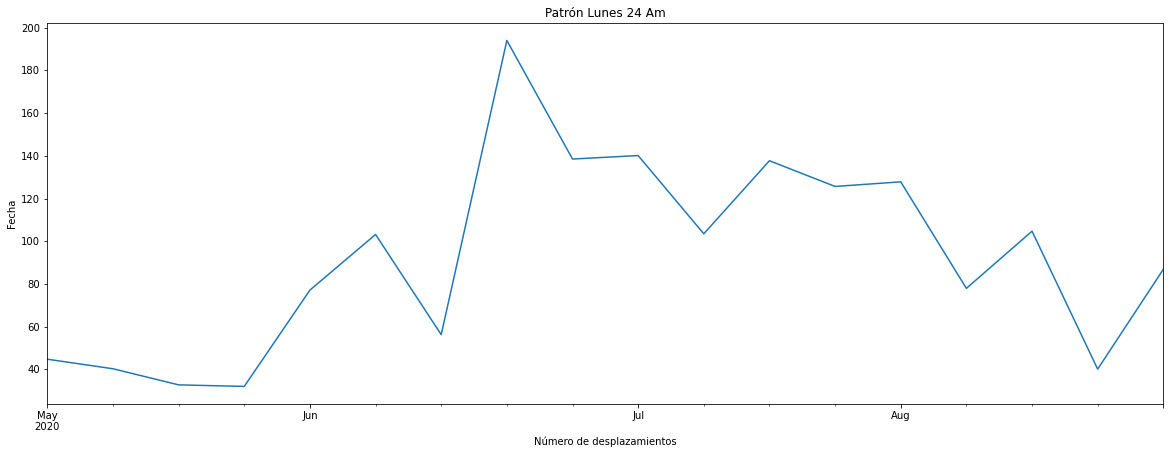

In [9]:
filtrar_Hora1[filtrar_Hora1.columns[0]].plot(figsize=(20,7), legend=None, title='Patrón Lunes 1 Am')
plt.xlabel('Número de desplazamientos')
plt.ylabel('Fecha')
plt.show()
filtrar_Hora2[filtrar_Hora2.columns[0]].plot(figsize=(20,7), legend=None, title='Patrón Lunes 2 Am')
plt.xlabel('Número de desplazamientos')
plt.ylabel('Fecha')
plt.show()
filtrar_Hora3[filtrar_Hora3.columns[0]].plot(figsize=(20,7), legend=None, title='Patrón Lunes 7 Am')
plt.xlabel('Número de desplazamientos')
plt.ylabel('Fecha')
plt.show()
filtrar_Hora4[filtrar_Hora4.columns[0]].plot(figsize=(20,7), legend=None, title='Patrón Lunes 8 Am')
plt.xlabel('Número de desplazamientos')
plt.ylabel('Fecha')
plt.show()
filtrar_Hora5[filtrar_Hora5.columns[0]].plot(figsize=(20,7), legend=None, title='Patrón Lunes 12 Am')
plt.xlabel('Número de desplazamientos')
plt.ylabel('Fecha')
plt.show()
filtrar_Hora6[filtrar_Hora6.columns[0]].plot(figsize=(20,7), legend=None, title='Patrón Lunes 13 Am')
plt.xlabel('Número de desplazamientos')
plt.ylabel('Fecha')
plt.show()
filtrar_Hora7[filtrar_Hora7.columns[0]].plot(figsize=(20,7), legend=None, title='Patrón Lunes 14 Am')
plt.xlabel('Número de desplazamientos')
plt.ylabel('Fecha')
plt.show()
filtrar_Hora8[filtrar_Hora8.columns[0]].plot(figsize=(20,7), legend=None, title='Patrón Lunes 17 Am')
plt.xlabel('Número de desplazamientos')
plt.ylabel('Fecha')
plt.show()
filtrar_Hora9[filtrar_Hora9.columns[0]].plot(figsize=(20,7), legend=None, title='Patrón Lunes 18 Am')
plt.xlabel('Número de desplazamientos')
plt.ylabel('Fecha')
plt.show()
filtrar_Hora10[filtrar_Hora10.columns[0]].plot(figsize=(20,7), legend=None, title='Patrón Lunes 19 Am')
plt.xlabel('Número de desplazamientos')
plt.ylabel('Fecha')
plt.show()
filtrar_Hora11[filtrar_Hora11.columns[0]].plot(figsize=(20,7), legend=None, title='Patrón Lunes 22 Am')
plt.xlabel('Número de desplazamientos')
plt.ylabel('Fecha')
plt.show()
filtrar_Hora12[filtrar_Hora12.columns[0]].plot(figsize=(20,7), legend=None, title='Patrón Lunes 23 Am')
plt.xlabel('Número de desplazamientos')
plt.ylabel('Fecha')
plt.show()
filtrar_Hora13[filtrar_Hora13.columns[0]].plot(figsize=(20,7), legend=None, title='Patrón Lunes 24 Am')
plt.xlabel('Número de desplazamientos')
plt.ylabel('Fecha')
plt.show()

# Periodo 1 - Lunes: Desescalada y Nueva Normalidad (2 mayo 2020-31 Agosto 2020)

In [10]:
Lunes = Lunes.drop(columns=['Fecha','ID_Dia','Hora','WeekNo'])
Lunes = Lunes.reset_index()
Lunes = Lunes.rename(columns={'2807905-2807901':'y'})
Lunes.tail()

,ds,y
427,2020-08-31 19:00:00,509.100
428,2020-08-31 20:00:00,293.615
429,2020-08-31 21:00:00,256.641
430,2020-08-31 22:00:00,172.866
431,2020-08-31 23:00:00,140.111


# Calculo de predicción Prophet 
## Definimos datos de entrenamiento y datos de prueba

## Establecemos una estacionalidad condicional

In [11]:
def est_Lunes1AM(ds):
    date = pd.to_datetime(ds)
    return (date.hour == 1)

def est_Lunes2AM(ds):
    date = pd.to_datetime(ds)
    return (date.hour == 2)

def est_Lunes3AM(ds):
    date = pd.to_datetime(ds)
    return (date.hour == 3)

def est_Lunes4AM(ds):
    date = pd.to_datetime(ds)
    return (date.hour == 4)

def est_Lunes5AM(ds):
    date = pd.to_datetime(ds)
    return (date.hour == 5)

def est_Lunes6AM(ds):
    date = pd.to_datetime(ds)
    return (date.hour == 6)

def est_Lunes7AM(ds):
    date = pd.to_datetime(ds)
    return (date.hour == 7)

def est_Lunes8AM(ds):
    date = pd.to_datetime(ds)
    return (date.hour == 8)

def est_Lunes9AM(ds):
    date = pd.to_datetime(ds)
    return (date.hour == 9)

def est_Lunes10AM(ds):
    date = pd.to_datetime(ds)
    return (date.hour == 10)

def est_Lunes11AM(ds):
    date = pd.to_datetime(ds)
    return (date.hour == 11)

def est_Lunes12PM(ds):
    date = pd.to_datetime(ds)
    return (date.hour == 12)

def est_Lunes13PM(ds):
    date = pd.to_datetime(ds)
    return (date.hour == 13)

def est_Lunes14PM(ds):
    date = pd.to_datetime(ds)
    return (date.hour == 14)

def est_Lunes15PM(ds):
    date = pd.to_datetime(ds)
    return (date.hour == 15)

def est_Lunes16PM(ds):
    date = pd.to_datetime(ds)
    return (date.hour == 16)

def est_Lunes17PM(ds):
    date = pd.to_datetime(ds)
    return (date.hour == 17)

def est_Lunes18PM(ds):
    date = pd.to_datetime(ds)
    return (date.hour == 18)

def est_Lunes19PM(ds):
    date = pd.to_datetime(ds)
    return (date.hour == 19)

def est_Lunes20PM(ds):
    date = pd.to_datetime(ds)
    return (date.hour == 20)

def est_Lunes21PM(ds):
    date = pd.to_datetime(ds)
    return (date.hour == 21)

def est_Lunes22PM(ds):
    date = pd.to_datetime(ds)
    return (date.hour == 22)

def est_Lunes23PM(ds):
    date = pd.to_datetime(ds)
    return (date.hour == 23)

def est_Lunes24AM(ds):
    date = pd.to_datetime(ds)
    return (date.hour == 0)

Lunes['Lunes1AM'] = Lunes['ds'].apply(est_Lunes1AM)
#Test['Lunes1AM'] = Test['ds'].apply(est_Lunes1AM)

Lunes['Lunes2AM'] = Lunes['ds'].apply(est_Lunes2AM)
#Test['Lunes2AM'] = Test['ds'].apply(est_Lunes2AM)

Lunes['Lunes3AM'] = Lunes['ds'].apply(est_Lunes3AM)
#Test['Lunes3AM'] = Test['ds'].apply(est_Lunes3AM)

Lunes['Lunes4AM'] = Lunes['ds'].apply(est_Lunes4AM)
#Test['Lunes4AM'] = Test['ds'].apply(est_Lunes4AM)

Lunes['Lunes5AM'] = Lunes['ds'].apply(est_Lunes5AM)
#Test['Lunes5AM'] = Test['ds'].apply(est_Lunes5AM)

Lunes['Lunes6AM'] = Lunes['ds'].apply(est_Lunes6AM)
#Test['Lunes6AM'] = Test['ds'].apply(est_Lunes6AM)

Lunes['Lunes7AM'] = Lunes['ds'].apply(est_Lunes7AM)
#Test['Lunes7AM'] = Test['ds'].apply(est_Lunes7AM)

Lunes['Lunes8AM'] = Lunes['ds'].apply(est_Lunes8AM)
#Test['Lunes8AM'] = Test['ds'].apply(est_Lunes8AM)

Lunes['Lunes9AM'] = Lunes['ds'].apply(est_Lunes9AM)
#Test['Lunes9AM'] = Test['ds'].apply(est_Lunes9AM)

Lunes['Lunes10AM'] = Lunes['ds'].apply(est_Lunes10AM)
#Test['Lunes10AM'] = Test['ds'].apply(est_Lunes10AM)

Lunes['Lunes11AM'] = Lunes['ds'].apply(est_Lunes11AM)
#Test['Lunes11AM'] = Test['ds'].apply(est_Lunes11AM)

Lunes['Lunes12PM'] = Lunes['ds'].apply(est_Lunes12PM)
#Test['Lunes12PM'] = Test['ds'].apply(est_Lunes12PM)

Lunes['Lunes13PM'] = Lunes['ds'].apply(est_Lunes13PM)
#Test['Lunes13PM'] = Test['ds'].apply(est_Lunes13PM)

Lunes['Lunes14PM'] = Lunes['ds'].apply(est_Lunes14PM)
#Test['Lunes14PM'] = Test['ds'].apply(est_Lunes14PM)

Lunes['Lunes15PM'] = Lunes['ds'].apply(est_Lunes15PM)
#Test['Lunes15PM'] = Test['ds'].apply(est_Lunes15PM)

Lunes['Lunes16PM'] = Lunes['ds'].apply(est_Lunes16PM)
#Test['Lunes16PM'] = Test['ds'].apply(est_Lunes16PM)

Lunes['Lunes17PM'] = Lunes['ds'].apply(est_Lunes17PM)
#Test['Lunes17PM'] = Test['ds'].apply(est_Lunes17PM)

Lunes['Lunes18PM'] = Lunes['ds'].apply(est_Lunes18PM)
#Test['Lunes18PM'] = Test['ds'].apply(est_Lunes18PM)

Lunes['Lunes19PM'] = Lunes['ds'].apply(est_Lunes19PM)
#Test['Lunes19PM'] = Test['ds'].apply(est_Lunes19PM)

Lunes['Lunes20PM'] = Lunes['ds'].apply(est_Lunes20PM)
#Test['Lunes20PM'] = Test['ds'].apply(est_Lunes20PM)

Lunes['Lunes21PM'] = Lunes['ds'].apply(est_Lunes21PM)
#Test['Lunes21PM'] = Test['ds'].apply(est_Lunes21PM)

Lunes['Lunes22PM'] = Lunes['ds'].apply(est_Lunes22PM)
#Test['Lunes22PM'] = Test['ds'].apply(est_Lunes22PM)

Lunes['Lunes23PM'] = Lunes['ds'].apply(est_Lunes23PM)
#Test['Lunes23PM'] = Test['ds'].apply(est_Lunes23PM)

Lunes['Lunes24AM'] = Lunes['ds'].apply(est_Lunes24AM)
#Test['Lunes24AM'] = Test['ds'].apply(est_Lunes24AM)



# Cross Validation 

In [12]:
tscv = TimeSeriesSplit(n_splits = 4)
rmse = []
#Lunes = Lunes.set_index("ds")

def crossvalidation():
    for train_index, test_index in tscv.split(Lunes):
        cv_train, cv_test = Lunes.iloc[train_index], Lunes.iloc[test_index]
        m = Prophet(weekly_seasonality=False,daily_seasonality=True)#,growth='flat')       
        m.add_seasonality(name='Lunes24AM_season', period=122, fourier_order=7, condition_name='Lunes24AM')
        m.add_seasonality(name='Lunes1AM_season', period=122, fourier_order=7, condition_name='Lunes1AM')
        m.add_seasonality(name='Lunes2AM_season', period=122, fourier_order=7, condition_name='Lunes2AM')
        m.add_seasonality(name='Lunes3AM_season', period=122, fourier_order=7, condition_name='Lunes3AM')
        m.add_seasonality(name='Lunes4AM_season', period=122, fourier_order=7, condition_name='Lunes4AM')
        m.add_seasonality(name='Lunes5AM_season', period=122, fourier_order=7, condition_name='Lunes5AM')
        m.add_seasonality(name='Lunes6AM_season', period=122, fourier_order=7, condition_name='Lunes6AM')
        m.add_seasonality(name='Lunes7AM_season', period=122, fourier_order=7, condition_name='Lunes7AM')
        m.add_seasonality(name='Lunes8AM_season', period=122, fourier_order=7, condition_name='Lunes8AM')
        m.add_seasonality(name='Lunes9AM_season', period=122, fourier_order=7, condition_name='Lunes9AM')
        m.add_seasonality(name='Lunes10AM_season', period=122, fourier_order=7, condition_name='Lunes10AM')
        m.add_seasonality(name='Lunes11AM_season', period=122, fourier_order=7, condition_name='Lunes11AM')
        m.add_seasonality(name='Lunes12PM_season', period=122, fourier_order=7, condition_name='Lunes12PM')
        m.add_seasonality(name='Lunes13PM_season', period=122, fourier_order=7, condition_name='Lunes13PM')
        m.add_seasonality(name='Lunes14PM_season', period=122, fourier_order=7, condition_name='Lunes14PM')        
        m.add_seasonality(name='Lunes15PM_season', period=122, fourier_order=7, condition_name='Lunes15PM')        
        m.add_seasonality(name='Lunes16PM_season', period=122, fourier_order=7, condition_name='Lunes16PM')
        m.add_seasonality(name='Lunes17PM_season', period=122, fourier_order=7, condition_name='Lunes17PM')
        m.add_seasonality(name='Lunes18PM_season', period=122, fourier_order=7, condition_name='Lunes18PM')
        m.add_seasonality(name='Lunes19PM_season', period=122, fourier_order=7, condition_name='Lunes19PM')
        m.add_seasonality(name='Lunes20PM_season', period=122, fourier_order=7, condition_name='Lunes20PM')
#         m.add_seasonality(name='Lunes21PM_season', period=122, fourier_order=7, condition_name='Lunes21PM')
#         m.add_seasonality(name='Lunes22PM_season', period=122, fourier_order=7, condition_name='Lunes22PM')
        m.add_seasonality(name='Lunes23PM_season', period=122, fourier_order=7, condition_name='Lunes23PM')

        m.fit(cv_train);
        future = cv_test.drop(columns=['y'])    
        forecast = m.predict(future)
        output=forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']] 
        yhat = output[['yhat']]
        true_values = cv_test.y
        rmse.append(sqrt(mean_squared_error(true_values, yhat)))
        print(rmse)
                
    RMSE = np.mean(rmse)
    #fig = m.plot_components(forecast)
    return RMSE, print("RMSE: {}".format(np.mean(rmse)))


    

In [13]:
RMSE = crossvalidation()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Initial log joint probability = -1053.19
Iteration  1. Log joint probability =    62.8248. Improved by 1116.02.
Iteration  2. Log joint probability =    111.612. Improved by 48.787.
Iteration  3. Log joint probability =    156.141. Improved by 44.5288.
Iteration  4. Log joint probability =    257.698. Improved by 101.558.
Iteration  5. Log joint probability =    309.359. Improved by 51.661.
Iteration  6. Log joint probability =    338.754. Improved by 29.3943.
Iteration  7. Log joint probability =     351.17. Improved by 12.4161.
Iteration  8. Log joint probability =    351.176. Improved by 0.00668126.
Iteration  9. Log joint probability =    351.183. Improved by 0.00645818.
Iteration 10. Log joint probability =    351.196. Improved by 0.0128698.
Iteration 11. Log joint probability =    351.197. Improved by 0.00158946.
Iteration 12. Log joint probability =    351.207. Improved by 0.00971766.
Iteration 13. Log joint probability =     351.22. Improved by 0.0125648.
Iteration 14. Log joi

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


[177.12850268393393]


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -12.1424
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       621.816    0.00554997       252.945           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       629.344    9.2463e-05       178.796      0.4783      0.4783      239   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     230       629.578   0.000182184       202.926   1.932e-06       0.001      318  LS failed, Hessian reset 
     299       629.624   4.53882e-05       59.0827      0.2185           1      408   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       629.802   5.91018e-06       69.5608           1           1      532   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     415       629.803   1.34359e-06    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


[177.12850268393393, 154.4863828369338]


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -8.84746
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       970.346    0.00202585       150.458       0.935       0.935      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       977.877   0.000440901       357.024      0.5843      0.5843      255   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       979.473    0.00132169       103.389           1           1      371   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     311       979.622   0.000173616       173.048   1.645e-06       0.001      421  LS failed, Hessian reset 
     399       979.938    0.00401568       146.235           1           1      521   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       981.122    0.00061932    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


[177.12850268393393, 154.4863828369338, 195.3317737202382]


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -13.0172
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1144.46     0.0422419         647.1           1           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1229.49     0.0025326       228.559           1           1      237   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1251.35    0.00231332       1139.69      0.3419      0.3419      349   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1267.64     0.0058449       210.888           1           1      467   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1273.47    0.00166714       402.164      0.5035      0.5035      591   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


[177.12850268393393, 154.4863828369338, 195.3317737202382, 1103.768986518907]
RMSE: 407.6789114400033


In [14]:
RMSE

(407.6789114400033, None)